In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
# Specify data paths
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
# Change training classes if necessary
NUM_CLASSES = 19

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([ 939,  955, 1756, 1010,  961, 3165, 1818, 1430, 1920, 1410, 1167,
       1401, 3044, 2022, 1510,  164,  257,  139,  190], dtype=int64))


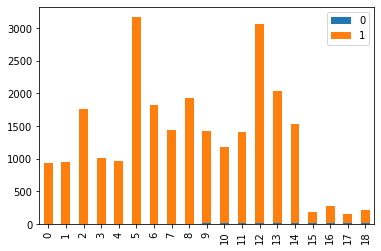

In [7]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 32)                1376      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 19)                3

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
295/296 [============================>.] - ETA: 0s - loss: 2.0778 - accuracy: 0.3619
Epoch 1: val_loss improved from inf to 1.24011, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 5s 9ms/step - loss: 2.0755 - accuracy: 0.3623 - val_loss: 1.2401 - val_accuracy: 0.6453
Epoch 2/1000
293/296 [============================>.] - ETA: 0s - loss: 0.7636 - accuracy: 0.8008
Epoch 2: val_loss improved from 1.24011 to 0.51623, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.7605 - accuracy: 0.8017 - val_loss: 0.5162 - val_accuracy: 0.8667
Epoch 3/1000
296/296 [==============================] - ETA: 0s - loss: 0.3866 - accuracy: 0.8979
Epoch 3: val_loss improved from 0.51623 to 0.32045, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.3866 - accuracy: 0.8979 - 

Epoch 26/1000
295/296 [============================>.] - ETA: 0s - loss: 0.0361 - accuracy: 0.9919
Epoch 26: val_loss did not improve from 0.04189
296/296 [==============================] - 3s 9ms/step - loss: 0.0361 - accuracy: 0.9919 - val_loss: 0.0437 - val_accuracy: 0.9902
Epoch 27/1000
295/296 [============================>.] - ETA: 0s - loss: 0.0337 - accuracy: 0.9925
Epoch 27: val_loss did not improve from 0.04189
296/296 [==============================] - 3s 9ms/step - loss: 0.0336 - accuracy: 0.9926 - val_loss: 0.0424 - val_accuracy: 0.9918
Epoch 28/1000
295/296 [============================>.] - ETA: 0s - loss: 0.0342 - accuracy: 0.9923
Epoch 28: val_loss improved from 0.04189 to 0.03735, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.0341 - accuracy: 0.9923 - val_loss: 0.0374 - val_accuracy: 0.9926
Epoch 29/1000
291/296 [============================>.] - ETA: 0s - loss: 0.0320 - accuracy: 0.

Epoch 54/1000
291/296 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9964
Epoch 54: val_loss did not improve from 0.02352
296/296 [==============================] - 3s 9ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.0235 - val_accuracy: 0.9957
Epoch 55/1000
292/296 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9962
Epoch 55: val_loss did not improve from 0.02352
296/296 [==============================] - 3s 9ms/step - loss: 0.0155 - accuracy: 0.9961 - val_loss: 0.0269 - val_accuracy: 0.9956
Epoch 56/1000
291/296 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9958
Epoch 56: val_loss did not improve from 0.02352
296/296 [==============================] - 3s 9ms/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.0266 - val_accuracy: 0.9945
Epoch 57/1000
291/296 [============================>.] - ETA: 0s - loss: 0.0147 - accuracy: 0.9963
Epoch 57: val_loss improved from 0.02352 to 0.02257, saving model t

Epoch 83/1000
296/296 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9976
Epoch 83: val_loss did not improve from 0.01935
296/296 [==============================] - 3s 9ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0208 - val_accuracy: 0.9967
Epoch 84/1000
295/296 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9978
Epoch 84: val_loss did not improve from 0.01935
296/296 [==============================] - 3s 10ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.0213 - val_accuracy: 0.9962
Epoch 85/1000
289/296 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9979
Epoch 85: val_loss did not improve from 0.01935
296/296 [==============================] - 3s 9ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0419 - val_accuracy: 0.9907
Epoch 86/1000
291/296 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9964
Epoch 86: val_loss did not improve from 0.01935
296/296 [=========

291/296 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9984
Epoch 112: val_loss did not improve from 0.01794
296/296 [==============================] - 3s 8ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0186 - val_accuracy: 0.9970
Epoch 113/1000
290/296 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9982
Epoch 113: val_loss did not improve from 0.01794
296/296 [==============================] - 2s 8ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0253 - val_accuracy: 0.9952
Epoch 114/1000
290/296 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979
Epoch 114: val_loss did not improve from 0.01794
296/296 [==============================] - 2s 8ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0197 - val_accuracy: 0.9968
Epoch 115/1000
296/296 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9976
Epoch 115: val_loss did not improve from 0.01794
296/296 [=================

292/296 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989
Epoch 141: val_loss did not improve from 0.01794
296/296 [==============================] - 3s 9ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0183 - val_accuracy: 0.9978
Epoch 142/1000
295/296 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9991
Epoch 142: val_loss did not improve from 0.01794
296/296 [==============================] - 3s 9ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0310 - val_accuracy: 0.9930
Epoch 142: early stopping


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

99/99 [==============================] - 1s 5ms/step - loss: 0.0179 - accuracy: 0.9965


In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.3459586e-04 1.2555447e-13 4.8605513e-17 2.1847366e-18 1.6755819e-25
 9.9986541e-01 7.6470661e-33 0.0000000e+00 6.4477982e-21 1.9954591e-09
 2.3247437e-11 0.0000000e+00 8.8489210e-10 9.9703503e-13 5.9697163e-09
 5.8133221e-33 3.2162159e-20 2.6820739e-30 7.1147865e-32]
5


# Confusion matrix

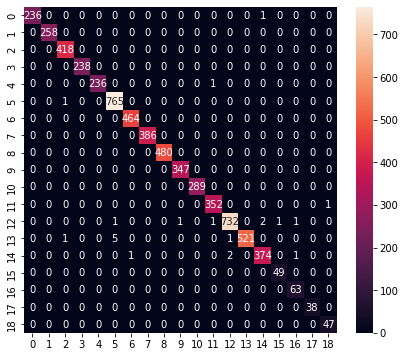

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       418
           3       1.00      1.00      1.00       238
           4       1.00      1.00      1.00       237
           5       0.99      1.00      1.00       766
           6       1.00      1.00      1.00       464
           7       1.00      1.00      1.00       386
           8       1.00      1.00      1.00       480
           9       1.00      1.00      1.00       347
          10       1.00      1.00      1.00       289
          11       0.99      1.00      1.00       353
          12       1.00      0.99      0.99       739
          13       1.00      0.99      0.99       528
          14       0.99      0.99      0.99       378
          15       0.98      1.00      0.99        49
          16       0.97      1.00      0.98        63
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Bhargav\AppData\Local\Temp\tmp6drk56zy\assets


8448

## Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 4.01 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.46224484e-04 9.69928212e-14 5.02475892e-17 1.57959061e-18
 1.72317359e-25 9.99853730e-01 1.03986464e-32 0.00000000e+00
 6.43124000e-21 1.22347643e-09 2.09216221e-11 0.00000000e+00
 6.88684110e-10 1.04517252e-12 5.00407360e-09 4.48210376e-33
 2.84881068e-20 2.67969002e-30 6.54268166e-32]
5


## Download model

In [24]:
!zip -r model.zip keypoint_classifier  

	zip warning: name not matched: keypoint_classifier

zip error: Nothing to do! (try: zip -r model.zip . -i keypoint_classifier)




---


# ❗️Hyperparameters Tuning

In [25]:
%load_ext tensorboard
from tensorboard.plugins.hparams import api as hp

In [26]:
# Init parameters to tune
HP_NUM_UNITS_1 = hp.HParam('num_units_1', hp.Discrete([16, 32, 64]))
HP_NUM_UNITS_2 = hp.HParam('num_units_2', hp.Discrete([8, 16, 32]))
HP_NUM_UNITS_3 = hp.HParam('num_units_3', hp.Discrete([8, 16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.0, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

In [27]:
with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS_1,HP_NUM_UNITS_2,HP_NUM_UNITS_3, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [28]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=15, verbose=1)

In [29]:
def train_test_model(hparams):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_1], activation='relu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_2], activation='relu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_3], activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
  
  model.compile(
    optimizer=hparams[HP_OPTIMIZER],
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
  
  cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)

  model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[
               cp_callback,
               es_callback,
               ]
  ) 

  # Load model with best accuracy
  model = tf.keras.models.load_model(model_save_path)

  _, accuracy = model.evaluate(X_test, y_test)
  return accuracy

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units_1 in HP_NUM_UNITS_1.domain.values:
  for num_units_2 in HP_NUM_UNITS_2.domain.values:
    for num_units_3 in HP_NUM_UNITS_3.domain.values:
      for dropout_rate in np.arange(HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value, 0.1):
        for optimizer in HP_OPTIMIZER.domain.values:
          hparams = {
              HP_NUM_UNITS_1: num_units_1,
              HP_NUM_UNITS_2: num_units_2,
              HP_NUM_UNITS_3: num_units_3,
              HP_DROPOUT: dropout_rate,
              HP_OPTIMIZER: optimizer,
          }
          run_name = "run-%d" % session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name: hparams[h] for h in hparams})
          run('logs/hparam_tuning/' + run_name, hparams)
          session_num += 1

--- Starting trial: run-0
{'num_units_1': 16, 'num_units_2': 8, 'num_units_3': 8, 'dropout': 0.0, 'optimizer': 'adam'}
Epoch 1/50
291/296 [============================>.] - ETA: 0s - loss: 2.5714 - accuracy: 0.1342
Epoch 1: val_loss improved from inf to 2.18018, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 4s 11ms/step - loss: 2.5652 - accuracy: 0.1355 - val_loss: 2.1802 - val_accuracy: 0.2193
Epoch 2/50
292/296 [============================>.] - ETA: 0s - loss: 1.7428 - accuracy: 0.4418
Epoch 2: val_loss improved from 2.18018 to 1.38190, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 1.7378 - accuracy: 0.4435 - val_loss: 1.3819 - val_accuracy: 0.5341
Epoch 3/50
294/296 [============================>.] - ETA: 0s - loss: 1.1362 - accuracy: 0.6517
Epoch 3: val_loss improved from 1.38190 to 0.99456, saving model to model/keypoint_classifier\k

296/296 [==============================] - 3s 9ms/step - loss: 0.1882 - accuracy: 0.9556 - val_loss: 0.1907 - val_accuracy: 0.9519
Epoch 25/50
292/296 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.9588
Epoch 25: val_loss improved from 0.19066 to 0.17730, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.1807 - accuracy: 0.9588 - val_loss: 0.1773 - val_accuracy: 0.9591
Epoch 26/50
293/296 [============================>.] - ETA: 0s - loss: 0.1713 - accuracy: 0.9609
Epoch 26: val_loss improved from 0.17730 to 0.17310, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.1714 - accuracy: 0.9606 - val_loss: 0.1731 - val_accuracy: 0.9577
Epoch 27/50
296/296 [==============================] - ETA: 0s - loss: 0.1672 - accuracy: 0.9622
Epoch 27: val_loss improved from 0.17310 to 0.16842, saving model to model/k

296/296 [==============================] - 3s 10ms/step - loss: 0.0914 - accuracy: 0.9796 - val_loss: 0.0874 - val_accuracy: 0.9829
Epoch 50/50
291/296 [============================>.] - ETA: 0s - loss: 0.0876 - accuracy: 0.9803
Epoch 50: val_loss did not improve from 0.08745
198/198 [==============================] - 1s 5ms/step - loss: 0.0874 - accuracy: 0.9829
--- Starting trial: run-1
{'num_units_1': 16, 'num_units_2': 8, 'num_units_3': 8, 'dropout': 0.0, 'optimizer': 'sgd'}
Epoch 1/50
290/296 [============================>.] - ETA: 0s - loss: 2.8994 - accuracy: 0.1227
Epoch 1: val_loss improved from inf to 2.85740, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 2.8985 - accuracy: 0.1227 - val_loss: 2.8574 - val_accuracy: 0.1275
Epoch 2/50
293/296 [============================>.] - ETA: 0s - loss: 2.8239 - accuracy: 0.1253
Epoch 2: val_loss improved from 2.85740 to 2.78863, saving model to model/key

Epoch 23/50
296/296 [==============================] - ETA: 0s - loss: 0.4969 - accuracy: 0.8617
Epoch 23: val_loss improved from 0.52915 to 0.50411, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.4969 - accuracy: 0.8617 - val_loss: 0.5041 - val_accuracy: 0.8606
Epoch 24/50
292/296 [============================>.] - ETA: 0s - loss: 0.4732 - accuracy: 0.8700
Epoch 24: val_loss improved from 0.50411 to 0.48685, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.4728 - accuracy: 0.8699 - val_loss: 0.4869 - val_accuracy: 0.8605
Epoch 25/50
293/296 [============================>.] - ETA: 0s - loss: 0.4513 - accuracy: 0.8770
Epoch 25: val_loss improved from 0.48685 to 0.47816, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.4509 - accuracy: 0.876

296/296 [==============================] - 3s 9ms/step - loss: 0.2294 - accuracy: 0.9456 - val_loss: 0.2362 - val_accuracy: 0.9435
Epoch 47/50
293/296 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9470
Epoch 47: val_loss improved from 0.23616 to 0.22887, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.2236 - accuracy: 0.9471 - val_loss: 0.2289 - val_accuracy: 0.9500
Epoch 48/50
291/296 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9488
Epoch 48: val_loss did not improve from 0.22887
296/296 [==============================] - 3s 9ms/step - loss: 0.2197 - accuracy: 0.9488 - val_loss: 0.2310 - val_accuracy: 0.9479
Epoch 49/50
292/296 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9510
Epoch 49: val_loss improved from 0.22887 to 0.21850, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [===================

Epoch 20/50
295/296 [============================>.] - ETA: 0s - loss: 1.1280 - accuracy: 0.6087
Epoch 20: val_loss did not improve from 0.65302
296/296 [==============================] - 3s 11ms/step - loss: 1.1275 - accuracy: 0.6089 - val_loss: 0.6625 - val_accuracy: 0.8380
Epoch 21/50
296/296 [==============================] - ETA: 0s - loss: 1.1156 - accuracy: 0.6157
Epoch 21: val_loss improved from 0.65302 to 0.61574, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 11ms/step - loss: 1.1156 - accuracy: 0.6157 - val_loss: 0.6157 - val_accuracy: 0.8557
Epoch 22/50
294/296 [============================>.] - ETA: 0s - loss: 1.0978 - accuracy: 0.6202
Epoch 22: val_loss did not improve from 0.61574
296/296 [==============================] - 3s 10ms/step - loss: 1.0974 - accuracy: 0.6202 - val_loss: 0.6271 - val_accuracy: 0.8507
Epoch 23/50
291/296 [============================>.] - ETA: 0s - loss: 1.0925 - accuracy: 0.6158


Epoch 46/50
295/296 [============================>.] - ETA: 0s - loss: 0.9506 - accuracy: 0.6775
Epoch 46: val_loss did not improve from 0.49298
296/296 [==============================] - 3s 10ms/step - loss: 0.9514 - accuracy: 0.6772 - val_loss: 0.4984 - val_accuracy: 0.8760
Epoch 47/50
293/296 [============================>.] - ETA: 0s - loss: 0.9472 - accuracy: 0.6786
Epoch 47: val_loss improved from 0.49298 to 0.49141, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 0.9467 - accuracy: 0.6787 - val_loss: 0.4914 - val_accuracy: 0.8820
Epoch 48/50
293/296 [============================>.] - ETA: 0s - loss: 0.9539 - accuracy: 0.6762
Epoch 48: val_loss did not improve from 0.49141
296/296 [==============================] - 3s 10ms/step - loss: 0.9539 - accuracy: 0.6760 - val_loss: 0.4950 - val_accuracy: 0.8833
Epoch 49/50
295/296 [============================>.] - ETA: 0s - loss: 0.9354 - accuracy: 0.6762


296/296 [==============================] - 3s 11ms/step - loss: 1.8546 - accuracy: 0.3780 - val_loss: 1.5602 - val_accuracy: 0.5769
Epoch 20/50
293/296 [============================>.] - ETA: 0s - loss: 1.8369 - accuracy: 0.3862
Epoch 20: val_loss improved from 1.56015 to 1.53947, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 11ms/step - loss: 1.8370 - accuracy: 0.3859 - val_loss: 1.5395 - val_accuracy: 0.5799
Epoch 21/50
292/296 [============================>.] - ETA: 0s - loss: 1.8184 - accuracy: 0.3923
Epoch 21: val_loss improved from 1.53947 to 1.52386, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 1.8181 - accuracy: 0.3925 - val_loss: 1.5239 - val_accuracy: 0.5656
Epoch 22/50
291/296 [============================>.] - ETA: 0s - loss: 1.7977 - accuracy: 0.3958
Epoch 22: val_loss improved from 1.52386 to 1.49488, saving model to mode

296/296 [==============================] - 3s 10ms/step - loss: 1.4984 - accuracy: 0.4812 - val_loss: 1.1601 - val_accuracy: 0.6877
Epoch 44/50
291/296 [============================>.] - ETA: 0s - loss: 1.4970 - accuracy: 0.4790
Epoch 44: val_loss improved from 1.16008 to 1.15290, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 1.4962 - accuracy: 0.4791 - val_loss: 1.1529 - val_accuracy: 0.6556
Epoch 45/50
293/296 [============================>.] - ETA: 0s - loss: 1.4848 - accuracy: 0.4814
Epoch 45: val_loss improved from 1.15290 to 1.14677, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 1.4850 - accuracy: 0.4814 - val_loss: 1.1468 - val_accuracy: 0.6549
Epoch 46/50
293/296 [============================>.] - ETA: 0s - loss: 1.4632 - accuracy: 0.4926
Epoch 46: val_loss improved from 1.14677 to 1.13029, saving model to mode

296/296 [==============================] - 3s 9ms/step - loss: 0.1803 - accuracy: 0.9522 - val_loss: 0.1804 - val_accuracy: 0.9542
Epoch 17/50
296/296 [==============================] - ETA: 0s - loss: 0.1719 - accuracy: 0.9553
Epoch 17: val_loss improved from 0.18039 to 0.17117, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.1719 - accuracy: 0.9553 - val_loss: 0.1712 - val_accuracy: 0.9553
Epoch 18/50
291/296 [============================>.] - ETA: 0s - loss: 0.1657 - accuracy: 0.9575
Epoch 18: val_loss improved from 0.17117 to 0.16243, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.1653 - accuracy: 0.9573 - val_loss: 0.1624 - val_accuracy: 0.9560
Epoch 19/50
293/296 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9600
Epoch 19: val_loss improved from 0.16243 to 0.15454, saving model to model/k

296/296 [==============================] - 3s 9ms/step - loss: 0.0771 - accuracy: 0.9835 - val_loss: 0.0793 - val_accuracy: 0.9815
Epoch 42/50
291/296 [============================>.] - ETA: 0s - loss: 0.0766 - accuracy: 0.9827
Epoch 42: val_loss did not improve from 0.07933
296/296 [==============================] - 3s 9ms/step - loss: 0.0765 - accuracy: 0.9827 - val_loss: 0.0805 - val_accuracy: 0.9832
Epoch 43/50
291/296 [============================>.] - ETA: 0s - loss: 0.0744 - accuracy: 0.9830
Epoch 43: val_loss improved from 0.07933 to 0.07458, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 0.0747 - accuracy: 0.9829 - val_loss: 0.0746 - val_accuracy: 0.9821
Epoch 44/50
292/296 [============================>.] - ETA: 0s - loss: 0.0732 - accuracy: 0.9841
Epoch 44: val_loss did not improve from 0.07458
296/296 [==============================] - 3s 9ms/step - loss: 0.0728 - accuracy: 0.9842 - val_loss

Epoch 16/50
294/296 [============================>.] - ETA: 0s - loss: 0.7572 - accuracy: 0.7901
Epoch 16: val_loss improved from 0.81488 to 0.73781, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.7562 - accuracy: 0.7906 - val_loss: 0.7378 - val_accuracy: 0.7979
Epoch 17/50
291/296 [============================>.] - ETA: 0s - loss: 0.6948 - accuracy: 0.8054
Epoch 17: val_loss improved from 0.73781 to 0.68057, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.6940 - accuracy: 0.8055 - val_loss: 0.6806 - val_accuracy: 0.8097
Epoch 18/50
293/296 [============================>.] - ETA: 0s - loss: 0.6449 - accuracy: 0.8187
Epoch 18: val_loss improved from 0.68057 to 0.63482, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.6447 - accuracy: 0.818

Epoch 40/50
291/296 [============================>.] - ETA: 0s - loss: 0.2814 - accuracy: 0.9257
Epoch 40: val_loss improved from 0.29418 to 0.28289, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.2809 - accuracy: 0.9257 - val_loss: 0.2829 - val_accuracy: 0.9196
Epoch 41/50
293/296 [============================>.] - ETA: 0s - loss: 0.2729 - accuracy: 0.9268
Epoch 41: val_loss improved from 0.28289 to 0.27750, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.2732 - accuracy: 0.9267 - val_loss: 0.2775 - val_accuracy: 0.9199
Epoch 42/50
294/296 [============================>.] - ETA: 0s - loss: 0.2675 - accuracy: 0.9304
Epoch 42: val_loss improved from 0.27750 to 0.27478, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.2668 - accuracy: 0.930

Epoch 13/50
291/296 [============================>.] - ETA: 0s - loss: 1.2320 - accuracy: 0.5583
Epoch 13: val_loss improved from 0.74406 to 0.70748, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 11ms/step - loss: 1.2316 - accuracy: 0.5584 - val_loss: 0.7075 - val_accuracy: 0.8277
Epoch 14/50
294/296 [============================>.] - ETA: 0s - loss: 1.2224 - accuracy: 0.5643
Epoch 14: val_loss improved from 0.70748 to 0.70348, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 11ms/step - loss: 1.2217 - accuracy: 0.5647 - val_loss: 0.7035 - val_accuracy: 0.8325
Epoch 15/50
293/296 [============================>.] - ETA: 0s - loss: 1.1838 - accuracy: 0.5789
Epoch 15: val_loss improved from 0.70348 to 0.68111, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 11ms/step - loss: 1.1840 - accuracy: 0.

295/296 [============================>.] - ETA: 0s - loss: 0.9603 - accuracy: 0.6671
Epoch 38: val_loss did not improve from 0.47666
296/296 [==============================] - 3s 10ms/step - loss: 0.9607 - accuracy: 0.6668 - val_loss: 0.4973 - val_accuracy: 0.9112
Epoch 39/50
291/296 [============================>.] - ETA: 0s - loss: 0.9580 - accuracy: 0.6719
Epoch 39: val_loss improved from 0.47666 to 0.46942, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 0.9575 - accuracy: 0.6720 - val_loss: 0.4694 - val_accuracy: 0.9072
Epoch 40/50
291/296 [============================>.] - ETA: 0s - loss: 0.9333 - accuracy: 0.6804
Epoch 40: val_loss did not improve from 0.46942
296/296 [==============================] - 3s 10ms/step - loss: 0.9344 - accuracy: 0.6805 - val_loss: 0.4719 - val_accuracy: 0.9096
Epoch 41/50
293/296 [============================>.] - ETA: 0s - loss: 0.9427 - accuracy: 0.6781
Epoch 41: va

Epoch 13/50
292/296 [============================>.] - ETA: 0s - loss: 2.0595 - accuracy: 0.3170
Epoch 13: val_loss improved from 1.91475 to 1.82091, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 2.0596 - accuracy: 0.3166 - val_loss: 1.8209 - val_accuracy: 0.4565
Epoch 14/50
293/296 [============================>.] - ETA: 0s - loss: 2.0008 - accuracy: 0.3339
Epoch 14: val_loss improved from 1.82091 to 1.74577, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 2.0003 - accuracy: 0.3342 - val_loss: 1.7458 - val_accuracy: 0.4695
Epoch 15/50
292/296 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.3541
Epoch 15: val_loss improved from 1.74577 to 1.66708, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 1.9451 - accuracy: 0.

296/296 [==============================] - 3s 10ms/step - loss: 1.4271 - accuracy: 0.5182 - val_loss: 0.9499 - val_accuracy: 0.7878
Epoch 37/50
295/296 [============================>.] - ETA: 0s - loss: 1.4150 - accuracy: 0.5194
Epoch 37: val_loss improved from 0.94990 to 0.93016, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 1.4147 - accuracy: 0.5193 - val_loss: 0.9302 - val_accuracy: 0.7922
Epoch 38/50
296/296 [==============================] - ETA: 0s - loss: 1.4026 - accuracy: 0.5252
Epoch 38: val_loss improved from 0.93016 to 0.92602, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 1.4026 - accuracy: 0.5252 - val_loss: 0.9260 - val_accuracy: 0.7884
Epoch 39/50
291/296 [============================>.] - ETA: 0s - loss: 1.3906 - accuracy: 0.5308
Epoch 39: val_loss improved from 0.92602 to 0.90352, saving model to mode

291/296 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9445
Epoch 10: val_loss improved from 0.23669 to 0.21152, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.2140 - accuracy: 0.9442 - val_loss: 0.2115 - val_accuracy: 0.9441
Epoch 11/50
290/296 [============================>.] - ETA: 0s - loss: 0.1970 - accuracy: 0.9505
Epoch 11: val_loss improved from 0.21152 to 0.19305, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.1964 - accuracy: 0.9506 - val_loss: 0.1931 - val_accuracy: 0.9490
Epoch 12/50
296/296 [==============================] - ETA: 0s - loss: 0.1797 - accuracy: 0.9564
Epoch 12: val_loss improved from 0.19305 to 0.18025, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 10ms/step - loss: 0.1797 - accuracy: 0.9564 - val_los

296/296 [==============================] - 3s 9ms/step - loss: 0.0718 - accuracy: 0.9838 - val_loss: 0.0774 - val_accuracy: 0.9848
Epoch 35/50
295/296 [============================>.] - ETA: 0s - loss: 0.0715 - accuracy: 0.9838
Epoch 35: val_loss improved from 0.07741 to 0.07575, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 0.0718 - accuracy: 0.9838 - val_loss: 0.0757 - val_accuracy: 0.9859
Epoch 36/50
295/296 [============================>.] - ETA: 0s - loss: 0.0701 - accuracy: 0.9836
Epoch 36: val_loss improved from 0.07575 to 0.07056, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.0703 - accuracy: 0.9835 - val_loss: 0.0706 - val_accuracy: 0.9838
Epoch 37/50
293/296 [============================>.] - ETA: 0s - loss: 0.0683 - accuracy: 0.9850
Epoch 37: val_loss did not improve from 0.07056
296/296 [===================

296/296 [==============================] - 3s 9ms/step - loss: 1.4728 - accuracy: 0.5465 - val_loss: 1.4088 - val_accuracy: 0.5460
Epoch 10/50
291/296 [============================>.] - ETA: 0s - loss: 1.3139 - accuracy: 0.5812
Epoch 10: val_loss improved from 1.40875 to 1.24330, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.3138 - accuracy: 0.5811 - val_loss: 1.2433 - val_accuracy: 0.5908
Epoch 11/50
296/296 [==============================] - ETA: 0s - loss: 1.1561 - accuracy: 0.6192
Epoch 11: val_loss improved from 1.24330 to 1.09705, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 1.1561 - accuracy: 0.6192 - val_loss: 1.0971 - val_accuracy: 0.6217
Epoch 12/50
296/296 [==============================] - ETA: 0s - loss: 1.0172 - accuracy: 0.6635
Epoch 12: val_loss improved from 1.09705 to 0.97072, saving model to model/k

290/296 [============================>.] - ETA: 0s - loss: 0.3743 - accuracy: 0.8900
Epoch 33: val_loss improved from 0.39998 to 0.39503, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.3739 - accuracy: 0.8901 - val_loss: 0.3950 - val_accuracy: 0.8766
Epoch 34/50
290/296 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.8943
Epoch 34: val_loss improved from 0.39503 to 0.37798, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.3641 - accuracy: 0.8948 - val_loss: 0.3780 - val_accuracy: 0.8887
Epoch 35/50
296/296 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.8979
Epoch 35: val_loss improved from 0.37798 to 0.36321, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.3530 - accuracy: 0.8979 - val_loss

294/296 [============================>.] - ETA: 0s - loss: 1.4576 - accuracy: 0.4894
Epoch 6: val_loss improved from 1.03157 to 0.93878, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.4574 - accuracy: 0.4897 - val_loss: 0.9388 - val_accuracy: 0.7666
Epoch 7/50
293/296 [============================>.] - ETA: 0s - loss: 1.3777 - accuracy: 0.5180
Epoch 7: val_loss improved from 0.93878 to 0.85714, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.3764 - accuracy: 0.5184 - val_loss: 0.8571 - val_accuracy: 0.7851
Epoch 8/50
295/296 [============================>.] - ETA: 0s - loss: 1.3328 - accuracy: 0.5409
Epoch 8: val_loss improved from 0.85714 to 0.79089, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 1.3325 - accuracy: 0.5410 - val_loss: 0.7

Epoch 31/50
291/296 [============================>.] - ETA: 0s - loss: 1.0464 - accuracy: 0.6434
Epoch 31: val_loss improved from 0.51626 to 0.51175, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.0483 - accuracy: 0.6428 - val_loss: 0.5117 - val_accuracy: 0.8747
Epoch 32/50
291/296 [============================>.] - ETA: 0s - loss: 1.0388 - accuracy: 0.6431
Epoch 32: val_loss improved from 0.51175 to 0.50967, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.0378 - accuracy: 0.6440 - val_loss: 0.5097 - val_accuracy: 0.8782
Epoch 33/50
291/296 [============================>.] - ETA: 0s - loss: 1.0334 - accuracy: 0.6442
Epoch 33: val_loss improved from 0.50967 to 0.50592, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.0336 - accuracy: 0.644

291/296 [============================>.] - ETA: 0s - loss: 2.3084 - accuracy: 0.2240
Epoch 6: val_loss improved from 2.27398 to 2.16824, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 2.3070 - accuracy: 0.2244 - val_loss: 2.1682 - val_accuracy: 0.2380
Epoch 7/50
292/296 [============================>.] - ETA: 0s - loss: 2.2218 - accuracy: 0.2493
Epoch 7: val_loss improved from 2.16824 to 2.04940, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 2.2213 - accuracy: 0.2496 - val_loss: 2.0494 - val_accuracy: 0.3479
Epoch 8/50
288/296 [============================>.] - ETA: 0s - loss: 2.1499 - accuracy: 0.2755
Epoch 8: val_loss improved from 2.04940 to 1.94426, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 2.1481 - accuracy: 0.2752 - val_loss: 1.9

296/296 [==============================] - 2s 8ms/step - loss: 1.3721 - accuracy: 0.5343 - val_loss: 0.8881 - val_accuracy: 0.7921
Epoch 30/50
291/296 [============================>.] - ETA: 0s - loss: 1.3557 - accuracy: 0.5317
Epoch 30: val_loss improved from 0.88810 to 0.87121, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.3563 - accuracy: 0.5310 - val_loss: 0.8712 - val_accuracy: 0.7967
Epoch 31/50
293/296 [============================>.] - ETA: 0s - loss: 1.3462 - accuracy: 0.5357
Epoch 31: val_loss improved from 0.87121 to 0.85298, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.3454 - accuracy: 0.5359 - val_loss: 0.8530 - val_accuracy: 0.7945
Epoch 32/50
294/296 [============================>.] - ETA: 0s - loss: 1.3294 - accuracy: 0.5479
Epoch 32: val_loss improved from 0.85298 to 0.84086, saving model to model/k

Epoch 3/50
288/296 [============================>.] - ETA: 0s - loss: 0.9632 - accuracy: 0.7188
Epoch 3: val_loss improved from 1.24566 to 0.76873, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.9559 - accuracy: 0.7212 - val_loss: 0.7687 - val_accuracy: 0.7910
Epoch 4/50
295/296 [============================>.] - ETA: 0s - loss: 0.6173 - accuracy: 0.8372
Epoch 4: val_loss improved from 0.76873 to 0.52406, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.6172 - accuracy: 0.8371 - val_loss: 0.5241 - val_accuracy: 0.8573
Epoch 5/50
295/296 [============================>.] - ETA: 0s - loss: 0.4552 - accuracy: 0.8756
Epoch 5: val_loss improved from 0.52406 to 0.40823, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.4548 - accuracy: 0.8757 - va

Epoch 27/50
291/296 [============================>.] - ETA: 0s - loss: 0.0999 - accuracy: 0.9787
Epoch 27: val_loss improved from 0.10654 to 0.10441, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.0993 - accuracy: 0.9788 - val_loss: 0.1044 - val_accuracy: 0.9764
Epoch 28/50
292/296 [============================>.] - ETA: 0s - loss: 0.0970 - accuracy: 0.9799
Epoch 28: val_loss improved from 0.10441 to 0.10072, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.0964 - accuracy: 0.9800 - val_loss: 0.1007 - val_accuracy: 0.9774
Epoch 29/50
292/296 [============================>.] - ETA: 0s - loss: 0.0945 - accuracy: 0.9808
Epoch 29: val_loss improved from 0.10072 to 0.09551, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.0942 - accuracy: 0.980

296/296 [==============================] - 2s 7ms/step - loss: 2.8899 - accuracy: 0.1286 - val_loss: 2.8407 - val_accuracy: 0.1457
Epoch 2/50
293/296 [============================>.] - ETA: 0s - loss: 2.7946 - accuracy: 0.1464
Epoch 2: val_loss improved from 2.84067 to 2.76005, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 2.7940 - accuracy: 0.1460 - val_loss: 2.7600 - val_accuracy: 0.1466
Epoch 3/50
291/296 [============================>.] - ETA: 0s - loss: 2.7010 - accuracy: 0.1442
Epoch 3: val_loss improved from 2.76005 to 2.66065, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 2.7002 - accuracy: 0.1443 - val_loss: 2.6606 - val_accuracy: 0.1375
Epoch 4/50
292/296 [============================>.] - ETA: 0s - loss: 2.5797 - accuracy: 0.1535
Epoch 4: val_loss improved from 2.66065 to 2.52296, saving model to model/keypoin

291/296 [============================>.] - ETA: 0s - loss: 0.5200 - accuracy: 0.8770
Epoch 25: val_loss improved from 0.53925 to 0.51249, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.5203 - accuracy: 0.8775 - val_loss: 0.5125 - val_accuracy: 0.8747
Epoch 26/50
290/296 [============================>.] - ETA: 0s - loss: 0.5032 - accuracy: 0.8817
Epoch 26: val_loss improved from 0.51249 to 0.49404, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.4993 - accuracy: 0.8828 - val_loss: 0.4940 - val_accuracy: 0.8787
Epoch 27/50
292/296 [============================>.] - ETA: 0s - loss: 0.4806 - accuracy: 0.8870
Epoch 27: val_loss improved from 0.49404 to 0.48438, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.4797 - accuracy: 0.8873 - val_loss

296/296 [==============================] - 2s 6ms/step - loss: 0.2548 - accuracy: 0.9441 - val_loss: 0.2623 - val_accuracy: 0.9384
Epoch 49/50
296/296 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.9462
Epoch 49: val_loss did not improve from 0.26229
296/296 [==============================] - 2s 6ms/step - loss: 0.2486 - accuracy: 0.9462 - val_loss: 0.2695 - val_accuracy: 0.9351
Epoch 50/50
295/296 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.9470
Epoch 50: val_loss improved from 0.26229 to 0.25063, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
198/198 [==============================] - 1s 4ms/step - loss: 0.2506 - accuracy: 0.9419
--- Starting trial: run-14
{'num_units_1': 16, 'num_units_2': 16, 'num_units_3': 8, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
293/296 [============================>.] - ETA: 0s - loss: 2.5553 - accuracy: 0.1922
Epoch 1: val_loss improved from inf to 2.06401, saving model to model/

291/296 [============================>.] - ETA: 0s - loss: 0.9744 - accuracy: 0.6655
Epoch 22: val_loss improved from 0.52773 to 0.50762, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.9746 - accuracy: 0.6655 - val_loss: 0.5076 - val_accuracy: 0.8762
Epoch 23/50
295/296 [============================>.] - ETA: 0s - loss: 0.9680 - accuracy: 0.6624
Epoch 23: val_loss improved from 0.50762 to 0.50349, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.9675 - accuracy: 0.6624 - val_loss: 0.5035 - val_accuracy: 0.8825
Epoch 24/50
294/296 [============================>.] - ETA: 0s - loss: 0.9525 - accuracy: 0.6675
Epoch 24: val_loss improved from 0.50349 to 0.47670, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.9517 - accuracy: 0.6677 - val_loss

Epoch 48/50
296/296 [==============================] - ETA: 0s - loss: 0.7697 - accuracy: 0.7379
Epoch 48: val_loss did not improve from 0.35967
296/296 [==============================] - 2s 8ms/step - loss: 0.7697 - accuracy: 0.7379 - val_loss: 0.3728 - val_accuracy: 0.9120
Epoch 49/50
292/296 [============================>.] - ETA: 0s - loss: 0.7820 - accuracy: 0.7329
Epoch 49: val_loss did not improve from 0.35967
296/296 [==============================] - 3s 8ms/step - loss: 0.7809 - accuracy: 0.7334 - val_loss: 0.3668 - val_accuracy: 0.9140
Epoch 50/50
294/296 [============================>.] - ETA: 0s - loss: 0.7643 - accuracy: 0.7380
Epoch 50: val_loss improved from 0.35967 to 0.34908, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
198/198 [==============================] - 1s 5ms/step - loss: 0.3491 - accuracy: 0.9175
--- Starting trial: run-15
{'num_units_1': 16, 'num_units_2': 16, 'num_units_3': 8, 'dropout': 0.1, 'optimizer': 'sgd'}
Epoch 1/50
293/296 [==

296/296 [==============================] - 2s 8ms/step - loss: 1.8366 - accuracy: 0.3480 - val_loss: 1.5444 - val_accuracy: 0.5165
Epoch 22/50
296/296 [==============================] - ETA: 0s - loss: 1.8099 - accuracy: 0.3584
Epoch 22: val_loss improved from 1.54435 to 1.50535, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.8099 - accuracy: 0.3584 - val_loss: 1.5054 - val_accuracy: 0.5102
Epoch 23/50
290/296 [============================>.] - ETA: 0s - loss: 1.7772 - accuracy: 0.3700
Epoch 23: val_loss improved from 1.50535 to 1.46645, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.7763 - accuracy: 0.3701 - val_loss: 1.4664 - val_accuracy: 0.5335
Epoch 24/50
294/296 [============================>.] - ETA: 0s - loss: 1.7392 - accuracy: 0.3817
Epoch 24: val_loss improved from 1.46645 to 1.41814, saving model to model/k

294/296 [============================>.] - ETA: 0s - loss: 1.3146 - accuracy: 0.5480
Epoch 45: val_loss improved from 0.87399 to 0.86395, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.3150 - accuracy: 0.5481 - val_loss: 0.8639 - val_accuracy: 0.7552
Epoch 46/50
291/296 [============================>.] - ETA: 0s - loss: 1.2946 - accuracy: 0.5500
Epoch 46: val_loss improved from 0.86395 to 0.85231, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 9ms/step - loss: 1.2946 - accuracy: 0.5508 - val_loss: 0.8523 - val_accuracy: 0.7808
Epoch 47/50
294/296 [============================>.] - ETA: 0s - loss: 1.2839 - accuracy: 0.5572
Epoch 47: val_loss improved from 0.85231 to 0.83328, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.2834 - accuracy: 0.5573 - val_loss

294/296 [============================>.] - ETA: 0s - loss: 0.1277 - accuracy: 0.9708
Epoch 18: val_loss improved from 0.13937 to 0.13798, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.1273 - accuracy: 0.9709 - val_loss: 0.1380 - val_accuracy: 0.9645
Epoch 19/50
290/296 [============================>.] - ETA: 0s - loss: 0.1235 - accuracy: 0.9734
Epoch 19: val_loss improved from 0.13798 to 0.11646, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.1224 - accuracy: 0.9736 - val_loss: 0.1165 - val_accuracy: 0.9702
Epoch 20/50
289/296 [============================>.] - ETA: 0s - loss: 0.1169 - accuracy: 0.9750
Epoch 20: val_loss did not improve from 0.11646
296/296 [==============================] - 2s 7ms/step - loss: 0.1168 - accuracy: 0.9748 - val_loss: 0.1230 - val_accuracy: 0.9685
Epoch 21/50
291/296 [===================

287/296 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.9883
Epoch 43: val_loss improved from 0.06138 to 0.06119, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.9883 - val_loss: 0.0612 - val_accuracy: 0.9861
Epoch 44/50
286/296 [===========================>..] - ETA: 0s - loss: 0.0574 - accuracy: 0.9879
Epoch 44: val_loss improved from 0.06119 to 0.05653, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.0566 - accuracy: 0.9880 - val_loss: 0.0565 - val_accuracy: 0.9876
Epoch 45/50
285/296 [===========================>..] - ETA: 0s - loss: 0.0570 - accuracy: 0.9882
Epoch 45: val_loss did not improve from 0.05653
296/296 [==============================] - 2s 6ms/step - loss: 0.0570 - accuracy: 0.9881 - val_loss: 0.0574 - val_accuracy: 0.9895
Epoch 46/50
291/296 [===================

Epoch 17/50
292/296 [============================>.] - ETA: 0s - loss: 0.7755 - accuracy: 0.7810
Epoch 17: val_loss improved from 0.82078 to 0.77615, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.7742 - accuracy: 0.7811 - val_loss: 0.7761 - val_accuracy: 0.7715
Epoch 18/50
290/296 [============================>.] - ETA: 0s - loss: 0.7291 - accuracy: 0.7927
Epoch 18: val_loss improved from 0.77615 to 0.72912, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.7298 - accuracy: 0.7924 - val_loss: 0.7291 - val_accuracy: 0.7891
Epoch 19/50
283/296 [===========================>..] - ETA: 0s - loss: 0.6866 - accuracy: 0.8048
Epoch 19: val_loss improved from 0.72912 to 0.68432, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.6855 - accuracy: 0.804

Epoch 41/50
295/296 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9472
Epoch 41: val_loss improved from 0.24867 to 0.23292, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.2361 - accuracy: 0.9472 - val_loss: 0.2329 - val_accuracy: 0.9438
Epoch 42/50
293/296 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.9490
Epoch 42: val_loss improved from 0.23292 to 0.22513, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.2289 - accuracy: 0.9490 - val_loss: 0.2251 - val_accuracy: 0.9522
Epoch 43/50
295/296 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9521
Epoch 43: val_loss improved from 0.22513 to 0.22054, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.2219 - accuracy: 0.952

296/296 [==============================] - 2s 6ms/step - loss: 1.0155 - accuracy: 0.6523 - val_loss: 0.5171 - val_accuracy: 0.8651
Epoch 15/50
295/296 [============================>.] - ETA: 0s - loss: 0.9948 - accuracy: 0.6567
Epoch 15: val_loss improved from 0.51708 to 0.51647, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.9951 - accuracy: 0.6566 - val_loss: 0.5165 - val_accuracy: 0.8744
Epoch 16/50
291/296 [============================>.] - ETA: 0s - loss: 0.9845 - accuracy: 0.6602
Epoch 16: val_loss improved from 0.51647 to 0.49573, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.9833 - accuracy: 0.6608 - val_loss: 0.4957 - val_accuracy: 0.8804
Epoch 17/50
287/296 [============================>.] - ETA: 0s - loss: 0.9633 - accuracy: 0.6685
Epoch 17: val_loss improved from 0.49573 to 0.47602, saving model to model/k

291/296 [============================>.] - ETA: 0s - loss: 0.7881 - accuracy: 0.7356
Epoch 39: val_loss did not improve from 0.34586
296/296 [==============================] - 2s 8ms/step - loss: 0.7871 - accuracy: 0.7363 - val_loss: 0.3489 - val_accuracy: 0.9257
Epoch 40/50
295/296 [============================>.] - ETA: 0s - loss: 0.7779 - accuracy: 0.7350
Epoch 40: val_loss improved from 0.34586 to 0.33294, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.7781 - accuracy: 0.7349 - val_loss: 0.3329 - val_accuracy: 0.9273
Epoch 41/50
293/296 [============================>.] - ETA: 0s - loss: 0.7591 - accuracy: 0.7399
Epoch 41: val_loss did not improve from 0.33294
296/296 [==============================] - 2s 7ms/step - loss: 0.7587 - accuracy: 0.7398 - val_loss: 0.3389 - val_accuracy: 0.9226
Epoch 42/50
295/296 [============================>.] - ETA: 0s - loss: 0.7602 - accuracy: 0.7420
Epoch 42: val_l

Epoch 14/50
294/296 [============================>.] - ETA: 0s - loss: 1.9633 - accuracy: 0.3203
Epoch 14: val_loss improved from 1.76603 to 1.71492, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.9634 - accuracy: 0.3200 - val_loss: 1.7149 - val_accuracy: 0.5222
Epoch 15/50
288/296 [============================>.] - ETA: 0s - loss: 1.9245 - accuracy: 0.3366
Epoch 15: val_loss improved from 1.71492 to 1.66023, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.9233 - accuracy: 0.3362 - val_loss: 1.6602 - val_accuracy: 0.4969
Epoch 16/50
292/296 [============================>.] - ETA: 0s - loss: 1.8807 - accuracy: 0.3486
Epoch 16: val_loss improved from 1.66023 to 1.60326, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.8810 - accuracy: 0.348

296/296 [==============================] - 2s 7ms/step - loss: 1.2872 - accuracy: 0.5568 - val_loss: 0.8532 - val_accuracy: 0.7819
Epoch 38/50
292/296 [============================>.] - ETA: 0s - loss: 1.2520 - accuracy: 0.5679
Epoch 38: val_loss improved from 0.85319 to 0.82950, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.2517 - accuracy: 0.5678 - val_loss: 0.8295 - val_accuracy: 0.7859
Epoch 39/50
292/296 [============================>.] - ETA: 0s - loss: 1.2420 - accuracy: 0.5695
Epoch 39: val_loss improved from 0.82950 to 0.80588, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.2417 - accuracy: 0.5691 - val_loss: 0.8059 - val_accuracy: 0.7973
Epoch 40/50
295/296 [============================>.] - ETA: 0s - loss: 1.2373 - accuracy: 0.5685
Epoch 40: val_loss improved from 0.80588 to 0.79109, saving model to model/k

296/296 [==============================] - 2s 7ms/step - loss: 0.1752 - accuracy: 0.9590 - val_loss: 0.1665 - val_accuracy: 0.9596
Epoch 11/50
287/296 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9637
Epoch 11: val_loss improved from 0.16651 to 0.15304, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.1597 - accuracy: 0.9636 - val_loss: 0.1530 - val_accuracy: 0.9610
Epoch 12/50
294/296 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9671
Epoch 12: val_loss improved from 0.15304 to 0.14303, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.1480 - accuracy: 0.9668 - val_loss: 0.1430 - val_accuracy: 0.9620
Epoch 13/50
292/296 [============================>.] - ETA: 0s - loss: 0.1378 - accuracy: 0.9704
Epoch 13: val_loss improved from 0.14303 to 0.13311, saving model to model/k

Epoch 35/50
286/296 [===========================>..] - ETA: 0s - loss: 0.0510 - accuracy: 0.9895
Epoch 35: val_loss improved from 0.05371 to 0.05308, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.0526 - accuracy: 0.9890 - val_loss: 0.0531 - val_accuracy: 0.9897
Epoch 36/50
295/296 [============================>.] - ETA: 0s - loss: 0.0505 - accuracy: 0.9894
Epoch 36: val_loss did not improve from 0.05308
296/296 [==============================] - 2s 6ms/step - loss: 0.0505 - accuracy: 0.9894 - val_loss: 0.0531 - val_accuracy: 0.9899
Epoch 37/50
296/296 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9891
Epoch 37: val_loss did not improve from 0.05308
296/296 [==============================] - 2s 5ms/step - loss: 0.0493 - accuracy: 0.9891 - val_loss: 0.0539 - val_accuracy: 0.9891
Epoch 38/50
284/296 [===========================>..] - ETA: 0s - loss: 0.0494 - accuracy: 0.9897
Epo

Epoch 10/50
293/296 [============================>.] - ETA: 0s - loss: 1.1778 - accuracy: 0.6729
Epoch 10: val_loss improved from 1.28662 to 1.13528, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.1763 - accuracy: 0.6734 - val_loss: 1.1353 - val_accuracy: 0.6895
Epoch 11/50
292/296 [============================>.] - ETA: 0s - loss: 1.0344 - accuracy: 0.7278
Epoch 11: val_loss improved from 1.13528 to 1.00411, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.0333 - accuracy: 0.7280 - val_loss: 1.0041 - val_accuracy: 0.7365
Epoch 12/50
293/296 [============================>.] - ETA: 0s - loss: 0.9144 - accuracy: 0.7625
Epoch 12: val_loss improved from 1.00411 to 0.90069, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.9140 - accuracy: 0.762

296/296 [==============================] - 1s 5ms/step - loss: 0.2403 - accuracy: 0.9370 - val_loss: 0.2452 - val_accuracy: 0.9359
Epoch 34/50
296/296 [==============================] - ETA: 0s - loss: 0.2328 - accuracy: 0.9398
Epoch 34: val_loss improved from 0.24518 to 0.23968, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.2328 - accuracy: 0.9398 - val_loss: 0.2397 - val_accuracy: 0.9341
Epoch 35/50
291/296 [============================>.] - ETA: 0s - loss: 0.2265 - accuracy: 0.9422
Epoch 35: val_loss improved from 0.23968 to 0.22908, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.2255 - accuracy: 0.9426 - val_loss: 0.2291 - val_accuracy: 0.9375
Epoch 36/50
294/296 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9444
Epoch 36: val_loss improved from 0.22908 to 0.22718, saving model to model/k

Epoch 7/50
292/296 [============================>.] - ETA: 0s - loss: 1.2057 - accuracy: 0.5735
Epoch 7: val_loss improved from 0.74653 to 0.67966, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.2062 - accuracy: 0.5731 - val_loss: 0.6797 - val_accuracy: 0.8052
Epoch 8/50
290/296 [============================>.] - ETA: 0s - loss: 1.1618 - accuracy: 0.5929
Epoch 8: val_loss improved from 0.67966 to 0.63848, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.1599 - accuracy: 0.5935 - val_loss: 0.6385 - val_accuracy: 0.8234
Epoch 9/50
296/296 [==============================] - ETA: 0s - loss: 1.1089 - accuracy: 0.6138
Epoch 9: val_loss improved from 0.63848 to 0.60051, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.1089 - accuracy: 0.6138 - va

293/296 [============================>.] - ETA: 0s - loss: 0.7414 - accuracy: 0.7475
Epoch 31: val_loss did not improve from 0.32200
296/296 [==============================] - 2s 6ms/step - loss: 0.7425 - accuracy: 0.7471 - val_loss: 0.3259 - val_accuracy: 0.9140
Epoch 32/50
290/296 [============================>.] - ETA: 0s - loss: 0.7383 - accuracy: 0.7475
Epoch 32: val_loss did not improve from 0.32200
296/296 [==============================] - 2s 6ms/step - loss: 0.7392 - accuracy: 0.7475 - val_loss: 0.3221 - val_accuracy: 0.9215
Epoch 33/50
289/296 [============================>.] - ETA: 0s - loss: 0.7338 - accuracy: 0.7516
Epoch 33: val_loss improved from 0.32200 to 0.31818, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.7356 - accuracy: 0.7510 - val_loss: 0.3182 - val_accuracy: 0.9237
Epoch 34/50
294/296 [============================>.] - ETA: 0s - loss: 0.7292 - accuracy: 0.7512
Epoch 34: val_l

296/296 [==============================] - 2s 6ms/step - loss: 2.3688 - accuracy: 0.2298 - val_loss: 2.1945 - val_accuracy: 0.3124
Epoch 6/50
288/296 [============================>.] - ETA: 0s - loss: 2.2639 - accuracy: 0.2458
Epoch 6: val_loss improved from 2.19448 to 2.06355, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 2.2636 - accuracy: 0.2445 - val_loss: 2.0635 - val_accuracy: 0.3324
Epoch 7/50
287/296 [============================>.] - ETA: 0s - loss: 2.1873 - accuracy: 0.2534
Epoch 7: val_loss improved from 2.06355 to 1.97254, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 2.1883 - accuracy: 0.2533 - val_loss: 1.9725 - val_accuracy: 0.3238
Epoch 8/50
291/296 [============================>.] - ETA: 0s - loss: 2.1278 - accuracy: 0.2677
Epoch 8: val_loss improved from 1.97254 to 1.89409, saving model to model/keypoin

292/296 [============================>.] - ETA: 0s - loss: 1.4028 - accuracy: 0.5110
Epoch 29: val_loss improved from 0.96979 to 0.95520, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.4030 - accuracy: 0.5106 - val_loss: 0.9552 - val_accuracy: 0.7623
Epoch 30/50
290/296 [============================>.] - ETA: 0s - loss: 1.3827 - accuracy: 0.5159
Epoch 30: val_loss improved from 0.95520 to 0.92893, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.3825 - accuracy: 0.5161 - val_loss: 0.9289 - val_accuracy: 0.7656
Epoch 31/50
293/296 [============================>.] - ETA: 0s - loss: 1.3720 - accuracy: 0.5159
Epoch 31: val_loss improved from 0.92893 to 0.90839, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.3715 - accuracy: 0.5159 - val_loss

296/296 [==============================] - 2s 5ms/step - loss: 1.3033 - accuracy: 0.5980 - val_loss: 1.0225 - val_accuracy: 0.6952
Epoch 3/50
296/296 [==============================] - ETA: 0s - loss: 0.8195 - accuracy: 0.7647
Epoch 3: val_loss improved from 1.02254 to 0.73115, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.8195 - accuracy: 0.7647 - val_loss: 0.7312 - val_accuracy: 0.7789
Epoch 4/50
288/296 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.8302
Epoch 4: val_loss improved from 0.73115 to 0.56844, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.6198 - accuracy: 0.8310 - val_loss: 0.5684 - val_accuracy: 0.8502
Epoch 5/50
294/296 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.8675
Epoch 5: val_loss improved from 0.56844 to 0.47457, saving model to model/keypoin

294/296 [============================>.] - ETA: 0s - loss: 0.0833 - accuracy: 0.9810
Epoch 27: val_loss improved from 0.09546 to 0.08987, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.0834 - accuracy: 0.9810 - val_loss: 0.0899 - val_accuracy: 0.9799
Epoch 28/50
285/296 [===========================>..] - ETA: 0s - loss: 0.0819 - accuracy: 0.9819
Epoch 28: val_loss improved from 0.08987 to 0.08794, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.0807 - accuracy: 0.9821 - val_loss: 0.0879 - val_accuracy: 0.9816
Epoch 29/50
290/296 [============================>.] - ETA: 0s - loss: 0.0796 - accuracy: 0.9824
Epoch 29: val_loss did not improve from 0.08794
296/296 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9825 - val_loss: 0.0944 - val_accuracy: 0.9781
Epoch 30/50
284/296 [===================

Epoch 2/50
293/296 [============================>.] - ETA: 0s - loss: 2.8056 - accuracy: 0.1356
Epoch 2: val_loss improved from 2.85229 to 2.77837, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 2.8050 - accuracy: 0.1358 - val_loss: 2.7784 - val_accuracy: 0.1281
Epoch 3/50
295/296 [============================>.] - ETA: 0s - loss: 2.7343 - accuracy: 0.1473
Epoch 3: val_loss improved from 2.77837 to 2.71639, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 2.7340 - accuracy: 0.1475 - val_loss: 2.7164 - val_accuracy: 0.1555
Epoch 4/50
288/296 [============================>.] - ETA: 0s - loss: 2.6658 - accuracy: 0.1784
Epoch 4: val_loss improved from 2.71639 to 2.64138, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 2.6650 - accuracy: 0.1784 - va

296/296 [==============================] - 2s 5ms/step - loss: 0.5442 - accuracy: 0.8578 - val_loss: 0.5595 - val_accuracy: 0.8586
Epoch 26/50
291/296 [============================>.] - ETA: 0s - loss: 0.5247 - accuracy: 0.8629
Epoch 26: val_loss improved from 0.55954 to 0.53837, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.5230 - accuracy: 0.8632 - val_loss: 0.5384 - val_accuracy: 0.8618
Epoch 27/50
287/296 [============================>.] - ETA: 0s - loss: 0.5038 - accuracy: 0.8689
Epoch 27: val_loss improved from 0.53837 to 0.50555, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.5036 - accuracy: 0.8690 - val_loss: 0.5056 - val_accuracy: 0.8730
Epoch 28/50
291/296 [============================>.] - ETA: 0s - loss: 0.4849 - accuracy: 0.8755
Epoch 28: val_loss improved from 0.50555 to 0.49377, saving model to model/k

Epoch 50/50
288/296 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.9379
Epoch 50: val_loss improved from 0.28937 to 0.27940, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
198/198 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.9370
--- Starting trial: run-26
{'num_units_1': 16, 'num_units_2': 32, 'num_units_3': 8, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
292/296 [============================>.] - ETA: 0s - loss: 2.5841 - accuracy: 0.1640
Epoch 1: val_loss improved from inf to 2.09117, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 2.5801 - accuracy: 0.1646 - val_loss: 2.0912 - val_accuracy: 0.2613
Epoch 2/50
290/296 [============================>.] - ETA: 0s - loss: 1.9563 - accuracy: 0.3239
Epoch 2: val_loss improved from 2.09117 to 1.44940, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [=======

288/296 [============================>.] - ETA: 0s - loss: 0.8262 - accuracy: 0.7172
Epoch 23: val_loss improved from 0.38141 to 0.36057, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.8288 - accuracy: 0.7164 - val_loss: 0.3606 - val_accuracy: 0.9096
Epoch 24/50
291/296 [============================>.] - ETA: 0s - loss: 0.8180 - accuracy: 0.7210
Epoch 24: val_loss improved from 0.36057 to 0.35973, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.8170 - accuracy: 0.7210 - val_loss: 0.3597 - val_accuracy: 0.9088
Epoch 25/50
288/296 [============================>.] - ETA: 0s - loss: 0.8006 - accuracy: 0.7272
Epoch 25: val_loss improved from 0.35973 to 0.34931, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.8003 - accuracy: 0.7278 - val_loss

Epoch 49/50
295/296 [============================>.] - ETA: 0s - loss: 0.6538 - accuracy: 0.7792
Epoch 49: val_loss did not improve from 0.27464
296/296 [==============================] - 2s 7ms/step - loss: 0.6539 - accuracy: 0.7792 - val_loss: 0.2778 - val_accuracy: 0.9427
Epoch 50/50
291/296 [============================>.] - ETA: 0s - loss: 0.6630 - accuracy: 0.7779
Epoch 50: val_loss did not improve from 0.27464
198/198 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.9324
--- Starting trial: run-27
{'num_units_1': 16, 'num_units_2': 32, 'num_units_3': 8, 'dropout': 0.1, 'optimizer': 'sgd'}
Epoch 1/50
296/296 [==============================] - ETA: 0s - loss: 2.9067 - accuracy: 0.0934
Epoch 1: val_loss improved from inf to 2.85994, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 3s 8ms/step - loss: 2.9067 - accuracy: 0.0934 - val_loss: 2.8599 - val_accuracy: 0.1148
Epoch 2/50
288/296 [========

296/296 [==============================] - 2s 8ms/step - loss: 1.5751 - accuracy: 0.4682 - val_loss: 1.1958 - val_accuracy: 0.6923
Epoch 23/50
294/296 [============================>.] - ETA: 0s - loss: 1.5530 - accuracy: 0.4758
Epoch 23: val_loss improved from 1.19585 to 1.16438, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 1.5528 - accuracy: 0.4757 - val_loss: 1.1644 - val_accuracy: 0.7151
Epoch 24/50
292/296 [============================>.] - ETA: 0s - loss: 1.5394 - accuracy: 0.4797
Epoch 24: val_loss improved from 1.16438 to 1.13830, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.5388 - accuracy: 0.4799 - val_loss: 1.1383 - val_accuracy: 0.7340
Epoch 25/50
294/296 [============================>.] - ETA: 0s - loss: 1.5056 - accuracy: 0.4839
Epoch 25: val_loss improved from 1.13830 to 1.09908, saving model to model/k

287/296 [============================>.] - ETA: 0s - loss: 1.1467 - accuracy: 0.6114
Epoch 46: val_loss improved from 0.70051 to 0.68680, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.1476 - accuracy: 0.6110 - val_loss: 0.6868 - val_accuracy: 0.8385
Epoch 47/50
291/296 [============================>.] - ETA: 0s - loss: 1.1356 - accuracy: 0.6168
Epoch 47: val_loss improved from 0.68680 to 0.67825, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.1358 - accuracy: 0.6170 - val_loss: 0.6783 - val_accuracy: 0.8416
Epoch 48/50
286/296 [===========================>..] - ETA: 0s - loss: 1.1274 - accuracy: 0.6179
Epoch 48: val_loss improved from 0.67825 to 0.66818, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.1271 - accuracy: 0.6173 - val_loss

285/296 [===========================>..] - ETA: 0s - loss: 0.0814 - accuracy: 0.9834
Epoch 19: val_loss improved from 0.07715 to 0.07359, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.0807 - accuracy: 0.9834 - val_loss: 0.0736 - val_accuracy: 0.9834
Epoch 20/50
288/296 [============================>.] - ETA: 0s - loss: 0.0758 - accuracy: 0.9838
Epoch 20: val_loss improved from 0.07359 to 0.07195, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.0762 - accuracy: 0.9837 - val_loss: 0.0720 - val_accuracy: 0.9826
Epoch 21/50
287/296 [============================>.] - ETA: 0s - loss: 0.0729 - accuracy: 0.9840
Epoch 21: val_loss did not improve from 0.07195
296/296 [==============================] - 1s 5ms/step - loss: 0.0738 - accuracy: 0.9838 - val_loss: 0.0817 - val_accuracy: 0.9837
Epoch 22/50
288/296 [===================

292/296 [============================>.] - ETA: 0s - loss: 0.0342 - accuracy: 0.9929
Epoch 45: val_loss improved from 0.04064 to 0.04047, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.0339 - accuracy: 0.9929 - val_loss: 0.0405 - val_accuracy: 0.9918
Epoch 46/50
296/296 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9928
Epoch 46: val_loss did not improve from 0.04047
296/296 [==============================] - 1s 5ms/step - loss: 0.0329 - accuracy: 0.9928 - val_loss: 0.0436 - val_accuracy: 0.9902
Epoch 47/50
295/296 [============================>.] - ETA: 0s - loss: 0.0334 - accuracy: 0.9927
Epoch 47: val_loss did not improve from 0.04047
296/296 [==============================] - 1s 5ms/step - loss: 0.0333 - accuracy: 0.9928 - val_loss: 0.0416 - val_accuracy: 0.9907
Epoch 48/50
295/296 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9932
Epoch 48: val_l

Epoch 19/50
292/296 [============================>.] - ETA: 0s - loss: 0.4350 - accuracy: 0.8786
Epoch 19: val_loss improved from 0.47044 to 0.44652, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.4349 - accuracy: 0.8783 - val_loss: 0.4465 - val_accuracy: 0.8728
Epoch 20/50
291/296 [============================>.] - ETA: 0s - loss: 0.4085 - accuracy: 0.8862
Epoch 20: val_loss improved from 0.44652 to 0.42517, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.4090 - accuracy: 0.8866 - val_loss: 0.4252 - val_accuracy: 0.8744
Epoch 21/50
291/296 [============================>.] - ETA: 0s - loss: 0.3886 - accuracy: 0.8912
Epoch 21: val_loss improved from 0.42517 to 0.39881, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.3882 - accuracy: 0.891

296/296 [==============================] - 1s 5ms/step - loss: 0.1776 - accuracy: 0.9586 - val_loss: 0.1808 - val_accuracy: 0.9544
Epoch 43/50
291/296 [============================>.] - ETA: 0s - loss: 0.1746 - accuracy: 0.9590
Epoch 43: val_loss improved from 0.18077 to 0.17738, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.1737 - accuracy: 0.9591 - val_loss: 0.1774 - val_accuracy: 0.9565
Epoch 44/50
294/296 [============================>.] - ETA: 0s - loss: 0.1699 - accuracy: 0.9594
Epoch 44: val_loss improved from 0.17738 to 0.17484, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.1697 - accuracy: 0.9595 - val_loss: 0.1748 - val_accuracy: 0.9561
Epoch 45/50
292/296 [============================>.] - ETA: 0s - loss: 0.1655 - accuracy: 0.9604
Epoch 45: val_loss improved from 0.17484 to 0.16957, saving model to model/k

296/296 [==============================] - 2s 7ms/step - loss: 0.8447 - accuracy: 0.7125 - val_loss: 0.3800 - val_accuracy: 0.9169
Epoch 16/50
288/296 [============================>.] - ETA: 0s - loss: 0.8237 - accuracy: 0.7225
Epoch 16: val_loss improved from 0.38004 to 0.35962, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.8250 - accuracy: 0.7216 - val_loss: 0.3596 - val_accuracy: 0.9101
Epoch 17/50
296/296 [==============================] - ETA: 0s - loss: 0.8059 - accuracy: 0.7261
Epoch 17: val_loss improved from 0.35962 to 0.35698, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.8059 - accuracy: 0.7261 - val_loss: 0.3570 - val_accuracy: 0.9105
Epoch 18/50
296/296 [==============================] - ETA: 0s - loss: 0.8104 - accuracy: 0.7220
Epoch 18: val_loss improved from 0.35698 to 0.34452, saving model to model/k

296/296 [==============================] - 2s 6ms/step - loss: 0.6585 - accuracy: 0.7799 - val_loss: 0.2529 - val_accuracy: 0.9424
Epoch 42/50
296/296 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.7862
Epoch 42: val_loss improved from 0.25286 to 0.24625, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.6480 - accuracy: 0.7862 - val_loss: 0.2463 - val_accuracy: 0.9457
Epoch 43/50
293/296 [============================>.] - ETA: 0s - loss: 0.6463 - accuracy: 0.7816
Epoch 43: val_loss improved from 0.24625 to 0.24191, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.6469 - accuracy: 0.7814 - val_loss: 0.2419 - val_accuracy: 0.9454
Epoch 44/50
293/296 [============================>.] - ETA: 0s - loss: 0.6634 - accuracy: 0.7787
Epoch 44: val_loss did not improve from 0.24191
296/296 [===================

Epoch 16/50
296/296 [==============================] - ETA: 0s - loss: 1.7894 - accuracy: 0.3918
Epoch 16: val_loss improved from 1.55640 to 1.48352, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.7894 - accuracy: 0.3918 - val_loss: 1.4835 - val_accuracy: 0.5508
Epoch 17/50
288/296 [============================>.] - ETA: 0s - loss: 1.7384 - accuracy: 0.4083
Epoch 17: val_loss improved from 1.48352 to 1.42781, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.7382 - accuracy: 0.4082 - val_loss: 1.4278 - val_accuracy: 0.5664
Epoch 18/50
293/296 [============================>.] - ETA: 0s - loss: 1.6895 - accuracy: 0.4256
Epoch 18: val_loss improved from 1.42781 to 1.36981, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.6885 - accuracy: 0.426

296/296 [==============================] - 2s 6ms/step - loss: 1.1498 - accuracy: 0.6060 - val_loss: 0.7188 - val_accuracy: 0.7987
Epoch 40/50
293/296 [============================>.] - ETA: 0s - loss: 1.1472 - accuracy: 0.6066
Epoch 40: val_loss improved from 0.71879 to 0.70678, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.1471 - accuracy: 0.6067 - val_loss: 0.7068 - val_accuracy: 0.7994
Epoch 41/50
289/296 [============================>.] - ETA: 0s - loss: 1.1299 - accuracy: 0.6118
Epoch 41: val_loss improved from 0.70678 to 0.69406, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.1296 - accuracy: 0.6118 - val_loss: 0.6941 - val_accuracy: 0.8089
Epoch 42/50
286/296 [===========================>..] - ETA: 0s - loss: 1.1263 - accuracy: 0.6122
Epoch 42: val_loss improved from 0.69406 to 0.68509, saving model to model/k

Epoch 13/50
291/296 [============================>.] - ETA: 0s - loss: 0.0992 - accuracy: 0.9790
Epoch 13: val_loss improved from 0.10288 to 0.09291, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.0987 - accuracy: 0.9791 - val_loss: 0.0929 - val_accuracy: 0.9783
Epoch 14/50
292/296 [============================>.] - ETA: 0s - loss: 0.0911 - accuracy: 0.9805
Epoch 14: val_loss did not improve from 0.09291
296/296 [==============================] - 2s 6ms/step - loss: 0.0917 - accuracy: 0.9804 - val_loss: 0.0959 - val_accuracy: 0.9762
Epoch 15/50
291/296 [============================>.] - ETA: 0s - loss: 0.0861 - accuracy: 0.9821
Epoch 15: val_loss improved from 0.09291 to 0.08859, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.0865 - accuracy: 0.9821 - val_loss: 0.0886 - val_accuracy: 0.9807
Epoch 16/50
294/296 [=======

Epoch 39/50
287/296 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9924
Epoch 39: val_loss improved from 0.04089 to 0.03912, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9924 - val_loss: 0.0391 - val_accuracy: 0.9910
Epoch 40/50
291/296 [============================>.] - ETA: 0s - loss: 0.0300 - accuracy: 0.9926
Epoch 40: val_loss did not improve from 0.03912
296/296 [==============================] - 1s 5ms/step - loss: 0.0305 - accuracy: 0.9926 - val_loss: 0.0403 - val_accuracy: 0.9913
Epoch 41/50
286/296 [===========================>..] - ETA: 0s - loss: 0.0309 - accuracy: 0.9924
Epoch 41: val_loss improved from 0.03912 to 0.03685, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.0308 - accuracy: 0.9923 - val_loss: 0.0368 - val_accuracy: 0.9914
Epoch 42/50
285/296 [=======

Epoch 14/50
287/296 [============================>.] - ETA: 0s - loss: 0.7829 - accuracy: 0.7720
Epoch 14: val_loss improved from 0.84621 to 0.78968, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.7827 - accuracy: 0.7727 - val_loss: 0.7897 - val_accuracy: 0.7726
Epoch 15/50
288/296 [============================>.] - ETA: 0s - loss: 0.7277 - accuracy: 0.7895
Epoch 15: val_loss improved from 0.78968 to 0.72949, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.7271 - accuracy: 0.7900 - val_loss: 0.7295 - val_accuracy: 0.7799
Epoch 16/50
285/296 [===========================>..] - ETA: 0s - loss: 0.6797 - accuracy: 0.8036
Epoch 16: val_loss improved from 0.72949 to 0.69146, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.6804 - accuracy: 0.803

296/296 [==============================] - 1s 5ms/step - loss: 0.2363 - accuracy: 0.9408 - val_loss: 0.2318 - val_accuracy: 0.9420
Epoch 38/50
295/296 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.9439
Epoch 38: val_loss improved from 0.23179 to 0.22479, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.2274 - accuracy: 0.9439 - val_loss: 0.2248 - val_accuracy: 0.9394
Epoch 39/50
295/296 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9468
Epoch 39: val_loss improved from 0.22479 to 0.21568, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.2197 - accuracy: 0.9466 - val_loss: 0.2157 - val_accuracy: 0.9462
Epoch 40/50
289/296 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9485
Epoch 40: val_loss improved from 0.21568 to 0.21243, saving model to model/k

Epoch 11/50
295/296 [============================>.] - ETA: 0s - loss: 0.8947 - accuracy: 0.6947
Epoch 11: val_loss improved from 0.42351 to 0.39861, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.8950 - accuracy: 0.6943 - val_loss: 0.3986 - val_accuracy: 0.8956
Epoch 12/50
291/296 [============================>.] - ETA: 0s - loss: 0.8706 - accuracy: 0.6994
Epoch 12: val_loss improved from 0.39861 to 0.37696, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.8723 - accuracy: 0.6993 - val_loss: 0.3770 - val_accuracy: 0.9080
Epoch 13/50
292/296 [============================>.] - ETA: 0s - loss: 0.8354 - accuracy: 0.7124
Epoch 13: val_loss improved from 0.37696 to 0.35700, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 0.8346 - accuracy: 0.712

Epoch 36/50
292/296 [============================>.] - ETA: 0s - loss: 0.5793 - accuracy: 0.8071
Epoch 36: val_loss improved from 0.21034 to 0.21000, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 8ms/step - loss: 0.5782 - accuracy: 0.8077 - val_loss: 0.2100 - val_accuracy: 0.9550
Epoch 37/50
293/296 [============================>.] - ETA: 0s - loss: 0.5735 - accuracy: 0.8114
Epoch 37: val_loss did not improve from 0.21000
296/296 [==============================] - 2s 6ms/step - loss: 0.5730 - accuracy: 0.8114 - val_loss: 0.2123 - val_accuracy: 0.9523
Epoch 38/50
291/296 [============================>.] - ETA: 0s - loss: 0.5780 - accuracy: 0.8094
Epoch 38: val_loss did not improve from 0.21000
296/296 [==============================] - 2s 6ms/step - loss: 0.5792 - accuracy: 0.8086 - val_loss: 0.2127 - val_accuracy: 0.9539
Epoch 39/50
287/296 [============================>.] - ETA: 0s - loss: 0.5591 - accuracy: 0.8151
Epo

287/296 [============================>.] - ETA: 0s - loss: 1.8118 - accuracy: 0.3851
Epoch 11: val_loss improved from 1.57210 to 1.48228, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.8099 - accuracy: 0.3854 - val_loss: 1.4823 - val_accuracy: 0.5747
Epoch 12/50
286/296 [===========================>..] - ETA: 0s - loss: 1.7504 - accuracy: 0.4050
Epoch 12: val_loss improved from 1.48228 to 1.39204, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.7504 - accuracy: 0.4056 - val_loss: 1.3920 - val_accuracy: 0.5973
Epoch 13/50
290/296 [============================>.] - ETA: 0s - loss: 1.7049 - accuracy: 0.4184
Epoch 13: val_loss improved from 1.39204 to 1.31587, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.7041 - accuracy: 0.4187 - val_loss

296/296 [==============================] - 2s 7ms/step - loss: 1.0776 - accuracy: 0.6318 - val_loss: 0.5675 - val_accuracy: 0.8594
Epoch 35/50
293/296 [============================>.] - ETA: 0s - loss: 1.0557 - accuracy: 0.6379
Epoch 35: val_loss improved from 0.56753 to 0.55700, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.0567 - accuracy: 0.6376 - val_loss: 0.5570 - val_accuracy: 0.8644
Epoch 36/50
289/296 [============================>.] - ETA: 0s - loss: 1.0589 - accuracy: 0.6365
Epoch 36: val_loss improved from 0.55700 to 0.54908, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.0575 - accuracy: 0.6372 - val_loss: 0.5491 - val_accuracy: 0.8591
Epoch 37/50
289/296 [============================>.] - ETA: 0s - loss: 1.0344 - accuracy: 0.6486
Epoch 37: val_loss improved from 0.54908 to 0.53691, saving model to model/k

288/296 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.8778
Epoch 8: val_loss improved from 0.49157 to 0.44473, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.4641 - accuracy: 0.8784 - val_loss: 0.4447 - val_accuracy: 0.8849
Epoch 9/50
287/296 [============================>.] - ETA: 0s - loss: 0.4210 - accuracy: 0.8932
Epoch 9: val_loss improved from 0.44473 to 0.40118, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.4220 - accuracy: 0.8928 - val_loss: 0.4012 - val_accuracy: 0.8937
Epoch 10/50
291/296 [============================>.] - ETA: 0s - loss: 0.3878 - accuracy: 0.9030
Epoch 10: val_loss improved from 0.40118 to 0.37363, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.3869 - accuracy: 0.9031 - val_loss: 0

Epoch 32/50
294/296 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9737
Epoch 32: val_loss did not improve from 0.13318
296/296 [==============================] - 1s 5ms/step - loss: 0.1356 - accuracy: 0.9737 - val_loss: 0.1334 - val_accuracy: 0.9736
Epoch 33/50
295/296 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9726
Epoch 33: val_loss improved from 0.13318 to 0.12722, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.1333 - accuracy: 0.9725 - val_loss: 0.1272 - val_accuracy: 0.9731
Epoch 34/50
287/296 [============================>.] - ETA: 0s - loss: 0.1288 - accuracy: 0.9752
Epoch 34: val_loss improved from 0.12722 to 0.12445, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.1289 - accuracy: 0.9751 - val_loss: 0.1245 - val_accuracy: 0.9751
Epoch 35/50
287/296 [=======

Epoch 7/50
286/296 [===========================>..] - ETA: 0s - loss: 2.0025 - accuracy: 0.2793
Epoch 7: val_loss improved from 2.10829 to 1.93218, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 1.9998 - accuracy: 0.2793 - val_loss: 1.9322 - val_accuracy: 0.2879
Epoch 8/50
289/296 [============================>.] - ETA: 0s - loss: 1.8277 - accuracy: 0.3427
Epoch 8: val_loss improved from 1.93218 to 1.75978, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 1.8247 - accuracy: 0.3443 - val_loss: 1.7598 - val_accuracy: 0.4168
Epoch 9/50
294/296 [============================>.] - ETA: 0s - loss: 1.6613 - accuracy: 0.4643
Epoch 9: val_loss improved from 1.75978 to 1.60461, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 1.6611 - accuracy: 0.4644 - va

296/296 [==============================] - 2s 6ms/step - loss: 0.3447 - accuracy: 0.9165 - val_loss: 0.3562 - val_accuracy: 0.9113
Epoch 31/50
286/296 [===========================>..] - ETA: 0s - loss: 0.3304 - accuracy: 0.9189
Epoch 31: val_loss improved from 0.35625 to 0.34098, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.3308 - accuracy: 0.9186 - val_loss: 0.3410 - val_accuracy: 0.9118
Epoch 32/50
287/296 [============================>.] - ETA: 0s - loss: 0.3168 - accuracy: 0.9244
Epoch 32: val_loss improved from 0.34098 to 0.32850, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.3155 - accuracy: 0.9246 - val_loss: 0.3285 - val_accuracy: 0.9148
Epoch 33/50
286/296 [===========================>..] - ETA: 0s - loss: 0.3016 - accuracy: 0.9266
Epoch 33: val_loss improved from 0.32850 to 0.31413, saving model to model/k

Epoch 4/50
291/296 [============================>.] - ETA: 0s - loss: 1.5872 - accuracy: 0.4581
Epoch 4: val_loss improved from 1.28623 to 1.10308, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.5864 - accuracy: 0.4584 - val_loss: 1.1031 - val_accuracy: 0.7338
Epoch 5/50
291/296 [============================>.] - ETA: 0s - loss: 1.4811 - accuracy: 0.4945
Epoch 5: val_loss improved from 1.10308 to 0.98991, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 7ms/step - loss: 1.4804 - accuracy: 0.4947 - val_loss: 0.9899 - val_accuracy: 0.7493
Epoch 6/50
294/296 [============================>.] - ETA: 0s - loss: 1.4099 - accuracy: 0.5163
Epoch 6: val_loss improved from 0.98991 to 0.89741, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.4097 - accuracy: 0.5165 - va

Epoch 28/50
288/296 [============================>.] - ETA: 0s - loss: 0.8977 - accuracy: 0.6960
Epoch 28: val_loss did not improve from 0.42699
296/296 [==============================] - 2s 6ms/step - loss: 0.8970 - accuracy: 0.6959 - val_loss: 0.4369 - val_accuracy: 0.9072
Epoch 29/50
291/296 [============================>.] - ETA: 0s - loss: 0.8827 - accuracy: 0.6985
Epoch 29: val_loss improved from 0.42699 to 0.41132, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.8819 - accuracy: 0.6990 - val_loss: 0.4113 - val_accuracy: 0.9150
Epoch 30/50
294/296 [============================>.] - ETA: 0s - loss: 0.8630 - accuracy: 0.7090
Epoch 30: val_loss did not improve from 0.41132
296/296 [==============================] - 2s 6ms/step - loss: 0.8653 - accuracy: 0.7091 - val_loss: 0.4268 - val_accuracy: 0.9032
Epoch 31/50
293/296 [============================>.] - ETA: 0s - loss: 0.8604 - accuracy: 0.7109
Epo

294/296 [============================>.] - ETA: 0s - loss: 2.6808 - accuracy: 0.1253
Epoch 3: val_loss improved from 2.73263 to 2.61855, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 2.6804 - accuracy: 0.1254 - val_loss: 2.6186 - val_accuracy: 0.1167
Epoch 4/50
287/296 [============================>.] - ETA: 0s - loss: 2.5876 - accuracy: 0.1344
Epoch 4: val_loss improved from 2.61855 to 2.52081, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 2.5870 - accuracy: 0.1346 - val_loss: 2.5208 - val_accuracy: 0.1337
Epoch 5/50
292/296 [============================>.] - ETA: 0s - loss: 2.4997 - accuracy: 0.1565
Epoch 5: val_loss improved from 2.52081 to 2.42446, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 2.4992 - accuracy: 0.1567 - val_loss: 2.4

296/296 [==============================] - 2s 6ms/step - loss: 1.5684 - accuracy: 0.4530 - val_loss: 1.1516 - val_accuracy: 0.7403
Epoch 27/50
293/296 [============================>.] - ETA: 0s - loss: 1.5496 - accuracy: 0.4585
Epoch 27: val_loss improved from 1.15161 to 1.12156, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.5492 - accuracy: 0.4584 - val_loss: 1.1216 - val_accuracy: 0.7508
Epoch 28/50
292/296 [============================>.] - ETA: 0s - loss: 1.5003 - accuracy: 0.4801
Epoch 28: val_loss improved from 1.12156 to 1.08508, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.5009 - accuracy: 0.4799 - val_loss: 1.0851 - val_accuracy: 0.7137
Epoch 29/50
289/296 [============================>.] - ETA: 0s - loss: 1.4881 - accuracy: 0.4802
Epoch 29: val_loss improved from 1.08508 to 1.06374, saving model to model/k

293/296 [============================>.] - ETA: 0s - loss: 1.1606 - accuracy: 0.6010
Epoch 50: val_loss improved from 0.74505 to 0.72292, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
198/198 [==============================] - 1s 3ms/step - loss: 0.7229 - accuracy: 0.8523
--- Starting trial: run-40
{'num_units_1': 32, 'num_units_2': 8, 'num_units_3': 16, 'dropout': 0.0, 'optimizer': 'adam'}
Epoch 1/50
285/296 [===========================>..] - ETA: 0s - loss: 2.3389 - accuracy: 0.2639
Epoch 1: val_loss improved from inf to 1.69269, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 2.3147 - accuracy: 0.2739 - val_loss: 1.6927 - val_accuracy: 0.5371
Epoch 2/50
294/296 [============================>.] - ETA: 0s - loss: 1.2409 - accuracy: 0.6285
Epoch 2: val_loss improved from 1.69269 to 0.95542, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [===================

288/296 [============================>.] - ETA: 0s - loss: 0.1015 - accuracy: 0.9792
Epoch 23: val_loss improved from 0.10398 to 0.10038, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.1016 - accuracy: 0.9792 - val_loss: 0.1004 - val_accuracy: 0.9769
Epoch 24/50
286/296 [===========================>..] - ETA: 0s - loss: 0.0993 - accuracy: 0.9792
Epoch 24: val_loss improved from 0.10038 to 0.09887, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.0992 - accuracy: 0.9791 - val_loss: 0.0989 - val_accuracy: 0.9812
Epoch 25/50
296/296 [==============================] - ETA: 0s - loss: 0.0938 - accuracy: 0.9809
Epoch 25: val_loss improved from 0.09887 to 0.09211, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.0938 - accuracy: 0.9809 - val_loss

286/296 [===========================>..] - ETA: 0s - loss: 0.0537 - accuracy: 0.9885
Epoch 49: val_loss improved from 0.06231 to 0.05877, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.0537 - accuracy: 0.9885 - val_loss: 0.0588 - val_accuracy: 0.9888
Epoch 50/50
294/296 [============================>.] - ETA: 0s - loss: 0.0532 - accuracy: 0.9894
Epoch 50: val_loss improved from 0.05877 to 0.05812, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
198/198 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9872
--- Starting trial: run-41
{'num_units_1': 32, 'num_units_2': 8, 'num_units_3': 16, 'dropout': 0.0, 'optimizer': 'sgd'}
Epoch 1/50
295/296 [============================>.] - ETA: 0s - loss: 2.8864 - accuracy: 0.1007
Epoch 1: val_loss improved from inf to 2.83612, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==================

283/296 [===========================>..] - ETA: 0s - loss: 0.4400 - accuracy: 0.8712
Epoch 22: val_loss improved from 0.47647 to 0.44073, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.4399 - accuracy: 0.8716 - val_loss: 0.4407 - val_accuracy: 0.8668
Epoch 23/50
294/296 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8831
Epoch 23: val_loss improved from 0.44073 to 0.41064, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.4101 - accuracy: 0.8835 - val_loss: 0.4106 - val_accuracy: 0.8755
Epoch 24/50
291/296 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8927
Epoch 24: val_loss improved from 0.41064 to 0.39107, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.3825 - accuracy: 0.8926 - val_loss

Epoch 46/50
294/296 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9694
Epoch 46: val_loss improved from 0.15680 to 0.15260, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.1518 - accuracy: 0.9694 - val_loss: 0.1526 - val_accuracy: 0.9672
Epoch 47/50
290/296 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9717
Epoch 47: val_loss improved from 0.15260 to 0.14853, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.1475 - accuracy: 0.9715 - val_loss: 0.1485 - val_accuracy: 0.9679
Epoch 48/50
286/296 [===========================>..] - ETA: 0s - loss: 0.1444 - accuracy: 0.9701
Epoch 48: val_loss did not improve from 0.14853
296/296 [==============================] - 1s 5ms/step - loss: 0.1440 - accuracy: 0.9702 - val_loss: 0.1504 - val_accuracy: 0.9658
Epoch 49/50
293/296 [=======

296/296 [==============================] - 2s 6ms/step - loss: 0.8184 - accuracy: 0.7220 - val_loss: 0.3314 - val_accuracy: 0.9294
Epoch 20/50
292/296 [============================>.] - ETA: 0s - loss: 0.8014 - accuracy: 0.7267
Epoch 20: val_loss did not improve from 0.33144
296/296 [==============================] - 2s 6ms/step - loss: 0.8023 - accuracy: 0.7262 - val_loss: 0.3365 - val_accuracy: 0.9272
Epoch 21/50
289/296 [============================>.] - ETA: 0s - loss: 0.7872 - accuracy: 0.7361
Epoch 21: val_loss improved from 0.33144 to 0.31643, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.7871 - accuracy: 0.7363 - val_loss: 0.3164 - val_accuracy: 0.9229
Epoch 22/50
294/296 [============================>.] - ETA: 0s - loss: 0.7921 - accuracy: 0.7367
Epoch 22: val_loss did not improve from 0.31643
296/296 [==============================] - 2s 6ms/step - loss: 0.7918 - accuracy: 0.7365 - val_loss:

289/296 [============================>.] - ETA: 0s - loss: 0.6021 - accuracy: 0.8047
Epoch 46: val_loss did not improve from 0.23012
296/296 [==============================] - 2s 6ms/step - loss: 0.6025 - accuracy: 0.8044 - val_loss: 0.2420 - val_accuracy: 0.9496
Epoch 47/50
292/296 [============================>.] - ETA: 0s - loss: 0.5994 - accuracy: 0.8072
Epoch 47: val_loss did not improve from 0.23012
296/296 [==============================] - 2s 7ms/step - loss: 0.6016 - accuracy: 0.8073 - val_loss: 0.2414 - val_accuracy: 0.9503
Epoch 48/50
294/296 [============================>.] - ETA: 0s - loss: 0.5929 - accuracy: 0.8058
Epoch 48: val_loss did not improve from 0.23012
296/296 [==============================] - 2s 6ms/step - loss: 0.5932 - accuracy: 0.8060 - val_loss: 0.2407 - val_accuracy: 0.9506
Epoch 49/50
290/296 [============================>.] - ETA: 0s - loss: 0.5960 - accuracy: 0.8063
Epoch 49: val_loss did not improve from 0.23012
296/296 [==============================

286/296 [===========================>..] - ETA: 0s - loss: 1.8834 - accuracy: 0.3568
Epoch 20: val_loss improved from 1.67341 to 1.61530, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.8838 - accuracy: 0.3576 - val_loss: 1.6153 - val_accuracy: 0.4675
Epoch 21/50
292/296 [============================>.] - ETA: 0s - loss: 1.8477 - accuracy: 0.3781
Epoch 21: val_loss improved from 1.61530 to 1.55732, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.8487 - accuracy: 0.3778 - val_loss: 1.5573 - val_accuracy: 0.5550
Epoch 22/50
294/296 [============================>.] - ETA: 0s - loss: 1.7915 - accuracy: 0.3944
Epoch 22: val_loss improved from 1.55732 to 1.49803, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.7913 - accuracy: 0.3946 - val_loss

296/296 [==============================] - 2s 6ms/step - loss: 1.2780 - accuracy: 0.5607 - val_loss: 0.8604 - val_accuracy: 0.7804
Epoch 44/50
292/296 [============================>.] - ETA: 0s - loss: 1.2749 - accuracy: 0.5622
Epoch 44: val_loss improved from 0.86040 to 0.83923, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.2770 - accuracy: 0.5619 - val_loss: 0.8392 - val_accuracy: 0.7813
Epoch 45/50
294/296 [============================>.] - ETA: 0s - loss: 1.2458 - accuracy: 0.5710
Epoch 45: val_loss improved from 0.83923 to 0.81721, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.2449 - accuracy: 0.5712 - val_loss: 0.8172 - val_accuracy: 0.7875
Epoch 46/50
296/296 [==============================] - ETA: 0s - loss: 1.2433 - accuracy: 0.5700
Epoch 46: val_loss improved from 0.81721 to 0.80272, saving model to model/k

Epoch 17/50
296/296 [==============================] - ETA: 0s - loss: 0.0733 - accuracy: 0.9831
Epoch 17: val_loss improved from 0.08556 to 0.08202, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.0733 - accuracy: 0.9831 - val_loss: 0.0820 - val_accuracy: 0.9815
Epoch 18/50
295/296 [============================>.] - ETA: 0s - loss: 0.0705 - accuracy: 0.9829
Epoch 18: val_loss improved from 0.08202 to 0.07569, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.9829 - val_loss: 0.0757 - val_accuracy: 0.9837
Epoch 19/50
284/296 [===========================>..] - ETA: 0s - loss: 0.0654 - accuracy: 0.9840
Epoch 19: val_loss improved from 0.07569 to 0.07190, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.0658 - accuracy: 0.984

Epoch 43/50
295/296 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9928
Epoch 43: val_loss did not improve from 0.03960
296/296 [==============================] - 2s 6ms/step - loss: 0.0305 - accuracy: 0.9928 - val_loss: 0.0411 - val_accuracy: 0.9924
Epoch 44/50
295/296 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9937
Epoch 44: val_loss did not improve from 0.03960
296/296 [==============================] - 2s 6ms/step - loss: 0.0289 - accuracy: 0.9937 - val_loss: 0.0457 - val_accuracy: 0.9907
Epoch 45/50
295/296 [============================>.] - ETA: 0s - loss: 0.0283 - accuracy: 0.9931
Epoch 45: val_loss did not improve from 0.03960
296/296 [==============================] - 2s 6ms/step - loss: 0.0283 - accuracy: 0.9931 - val_loss: 0.0423 - val_accuracy: 0.9929
Epoch 46/50
293/296 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9931
Epoch 46: val_loss improved from 0.03960 to 0.03902, saving model to model/

291/296 [============================>.] - ETA: 0s - loss: 0.6990 - accuracy: 0.8034
Epoch 17: val_loss improved from 0.74689 to 0.68613, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.6976 - accuracy: 0.8039 - val_loss: 0.6861 - val_accuracy: 0.8029
Epoch 18/50
290/296 [============================>.] - ETA: 0s - loss: 0.6405 - accuracy: 0.8200
Epoch 18: val_loss improved from 0.68613 to 0.63377, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.6412 - accuracy: 0.8200 - val_loss: 0.6338 - val_accuracy: 0.8160
Epoch 19/50
293/296 [============================>.] - ETA: 0s - loss: 0.5944 - accuracy: 0.8322
Epoch 19: val_loss improved from 0.63377 to 0.59016, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.5938 - accuracy: 0.8322 - val_loss

296/296 [==============================] - 2s 6ms/step - loss: 0.2121 - accuracy: 0.9473 - val_loss: 0.2147 - val_accuracy: 0.9436
Epoch 41/50
287/296 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.9489
Epoch 41: val_loss improved from 0.21475 to 0.20824, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.2052 - accuracy: 0.9493 - val_loss: 0.2082 - val_accuracy: 0.9479
Epoch 42/50
296/296 [==============================] - ETA: 0s - loss: 0.2003 - accuracy: 0.9503
Epoch 42: val_loss improved from 0.20824 to 0.20202, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 1s 5ms/step - loss: 0.2003 - accuracy: 0.9503 - val_loss: 0.2020 - val_accuracy: 0.9496
Epoch 43/50
294/296 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9527
Epoch 43: val_loss improved from 0.20202 to 0.19919, saving model to model/k

296/296 [==============================] - ETA: 0s - loss: 0.9581 - accuracy: 0.6693
Epoch 14: val_loss improved from 0.47665 to 0.46370, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.9581 - accuracy: 0.6693 - val_loss: 0.4637 - val_accuracy: 0.8887
Epoch 15/50
294/296 [============================>.] - ETA: 0s - loss: 0.9380 - accuracy: 0.6770
Epoch 15: val_loss improved from 0.46370 to 0.44051, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.9387 - accuracy: 0.6771 - val_loss: 0.4405 - val_accuracy: 0.8985
Epoch 16/50
287/296 [============================>.] - ETA: 0s - loss: 0.9221 - accuracy: 0.6852
Epoch 16: val_loss improved from 0.44051 to 0.43550, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.9227 - accuracy: 0.6851 - val_loss

296/296 [==============================] - 2s 7ms/step - loss: 0.6936 - accuracy: 0.7678 - val_loss: 0.2872 - val_accuracy: 0.9365
Epoch 39/50
287/296 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.7669
Epoch 39: val_loss did not improve from 0.28716
296/296 [==============================] - 2s 6ms/step - loss: 0.6895 - accuracy: 0.7679 - val_loss: 0.2902 - val_accuracy: 0.9359
Epoch 40/50
293/296 [============================>.] - ETA: 0s - loss: 0.6769 - accuracy: 0.7718
Epoch 40: val_loss did not improve from 0.28716
296/296 [==============================] - 2s 6ms/step - loss: 0.6768 - accuracy: 0.7719 - val_loss: 0.2872 - val_accuracy: 0.9360
Epoch 41/50
292/296 [============================>.] - ETA: 0s - loss: 0.6812 - accuracy: 0.7730
Epoch 41: val_loss improved from 0.28716 to 0.27826, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.6804 - accuracy: 0.7732 - val_loss:

296/296 [==============================] - 2s 6ms/step - loss: 1.8058 - accuracy: 0.3750 - val_loss: 1.4648 - val_accuracy: 0.5617
Epoch 14/50
290/296 [============================>.] - ETA: 0s - loss: 1.7594 - accuracy: 0.3863
Epoch 14: val_loss improved from 1.46480 to 1.42090, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.7601 - accuracy: 0.3857 - val_loss: 1.4209 - val_accuracy: 0.5842
Epoch 15/50
287/296 [============================>.] - ETA: 0s - loss: 1.7221 - accuracy: 0.4028
Epoch 15: val_loss improved from 1.42090 to 1.36561, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.7233 - accuracy: 0.4020 - val_loss: 1.3656 - val_accuracy: 0.6453
Epoch 16/50
290/296 [============================>.] - ETA: 0s - loss: 1.6887 - accuracy: 0.4191
Epoch 16: val_loss improved from 1.36561 to 1.31393, saving model to model/k

296/296 [==============================] - ETA: 0s - loss: 1.2453 - accuracy: 0.5711
Epoch 37: val_loss improved from 0.75875 to 0.74633, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.2453 - accuracy: 0.5711 - val_loss: 0.7463 - val_accuracy: 0.8008
Epoch 38/50
292/296 [============================>.] - ETA: 0s - loss: 1.2248 - accuracy: 0.5784
Epoch 38: val_loss improved from 0.74633 to 0.71784, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.2246 - accuracy: 0.5785 - val_loss: 0.7178 - val_accuracy: 0.8155
Epoch 39/50
292/296 [============================>.] - ETA: 0s - loss: 1.2132 - accuracy: 0.5795
Epoch 39: val_loss improved from 0.71784 to 0.71275, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 1.2139 - accuracy: 0.5793 - val_loss

295/296 [============================>.] - ETA: 0s - loss: 0.1841 - accuracy: 0.9553
Epoch 10: val_loss improved from 0.20329 to 0.19250, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.1839 - accuracy: 0.9555 - val_loss: 0.1925 - val_accuracy: 0.9493
Epoch 11/50
288/296 [============================>.] - ETA: 0s - loss: 0.1630 - accuracy: 0.9633
Epoch 11: val_loss improved from 0.19250 to 0.16679, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 5ms/step - loss: 0.1626 - accuracy: 0.9635 - val_loss: 0.1668 - val_accuracy: 0.9652
Epoch 12/50
289/296 [============================>.] - ETA: 0s - loss: 0.1475 - accuracy: 0.9703
Epoch 12: val_loss improved from 0.16679 to 0.15308, saving model to model/keypoint_classifier\keypoint_classifier.hdf5
296/296 [==============================] - 2s 6ms/step - loss: 0.1478 - accuracy: 0.9703 - val_loss

In [ ]:
# !ATTENTION! Works only in Colab
%tensorboard --logdir logs/hparam_tuning

In [ ]:
!rm -rf logs